In [5]:
import importlib
import numpy as np

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

import matplotlib.pyplot as plt

import cluster_ambiguity_clustme as cac
import visualize_gmm as vg

importlib.reload(cac)
importlib.reload(vg)

<module 'visualize_gmm' from '/home/hj/cluster-ambiguity/src/clustme_data/visualize_gmm.py'>

In [52]:
X, label = load_digits(return_X_y=True)
X_tsne = TSNE(n_components=2).fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X)
X_isomap = Isomap(n_components=2).fit_transform(X)
X_lle = LocallyLinearEmbedding(n_components=2).fit_transform(X)
X_lda = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, label)

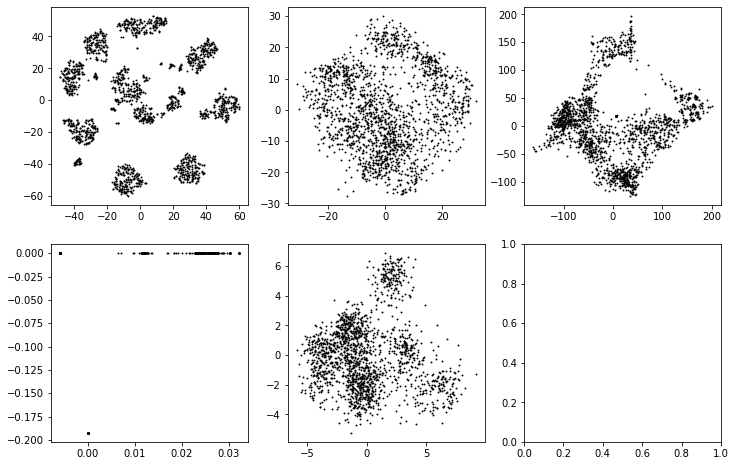

In [54]:
## visualize the X_tsne data as scatterplot
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
ax[0, 0].scatter(X_tsne[:, 0], X_tsne[:, 1], s=0.8, c="black")
ax[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], s=0.8, c="black")
ax[0, 2].scatter(X_isomap[:, 0], X_isomap[:, 1], s=0.8, c="black")
ax[1, 0].scatter(X_lle[:, 0], X_lle[:, 1], s=0.8, c="black")
ax[1, 1].scatter(X_lda[:, 0], X_lda[:, 1], s=0.8, c="black")

0.7719692146377477


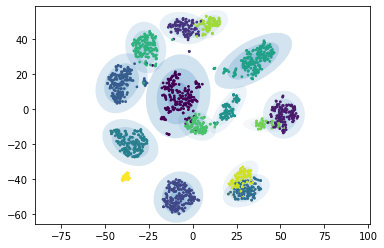

0.6179020136866408


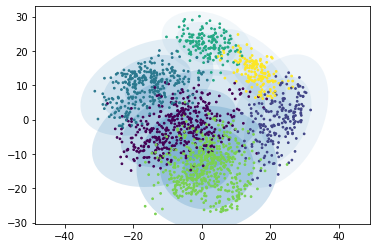

0.5565761558738065


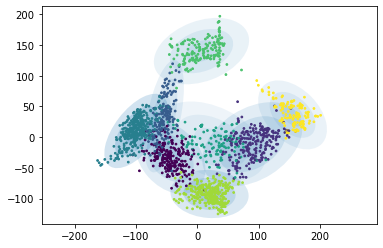

0.40150392139330504


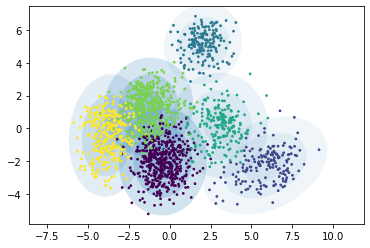

In [55]:
def run(data):
	ca = cac.ClusterAmbiguity()
	score = ca.fit(data)
	print(score)
	vg.plot_gmm(ca.gmm, data, ca.gaussian_info["proba_labels"])
	plt.show()

run(X_tsne)
run(X_pca)
run(X_isomap)
run(X_lda)

In [20]:
X, label = load_digits(return_X_y=True)
X_tsne_list = []
X_tsne_list.append(TSNE(n_components=2, perplexity=1).fit_transform(X))
X_tsne_list.append(TSNE(n_components=2, perplexity=2).fit_transform(X))
X_tsne_list.append(TSNE(n_components=2, perplexity=4).fit_transform(X))
X_tsne_list.append(TSNE(n_components=2, perplexity=8).fit_transform(X))
X_tsne_list.append(TSNE(n_components=2, perplexity=16).fit_transform(X))
X_tsne_list.append(TSNE(n_components=2, perplexity=32).fit_transform(X))
X_tsne_list.append(TSNE(n_components=2, perplexity=64).fit_transform(X))
X_tsne_list.append(TSNE(n_components=2, perplexity=128).fit_transform(X))
X_tsne_list.append(TSNE(n_components=2, perplexity=256).fit_transform(X))
X_tsne_list.append(TSNE(n_components=2, perplexity=512).fit_transform(X))
X_tsne_list.append(TSNE(n_components=2, perplexity=1024).fit_transform(X))



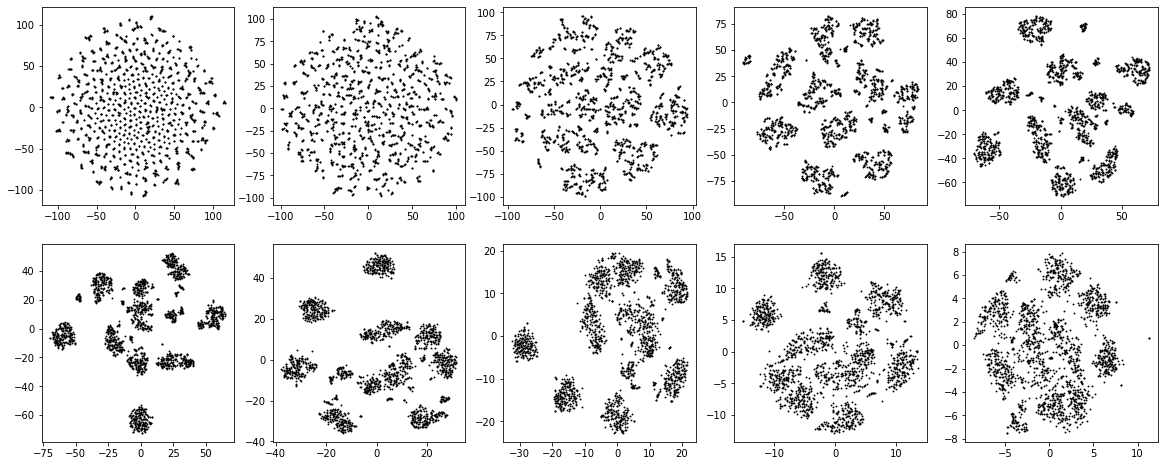

In [21]:
fig, ax = plt.subplots(2, 5, figsize=(20, 8))

for i in range(2):
	for j in range(5):
		ax[i, j].scatter(X_tsne_list[i*5+j][:, 0], X_tsne_list[i*5+j][:, 1], s=0.8, c="black")

0.4848045241087675  0.6253034763038159  0.468235304415099  0.30419443267895807  0.270510232080308  
0.2243307496942677  0.23955441023659663  0.26307655840779864  0.4055415458464393  0.45226444079540673  


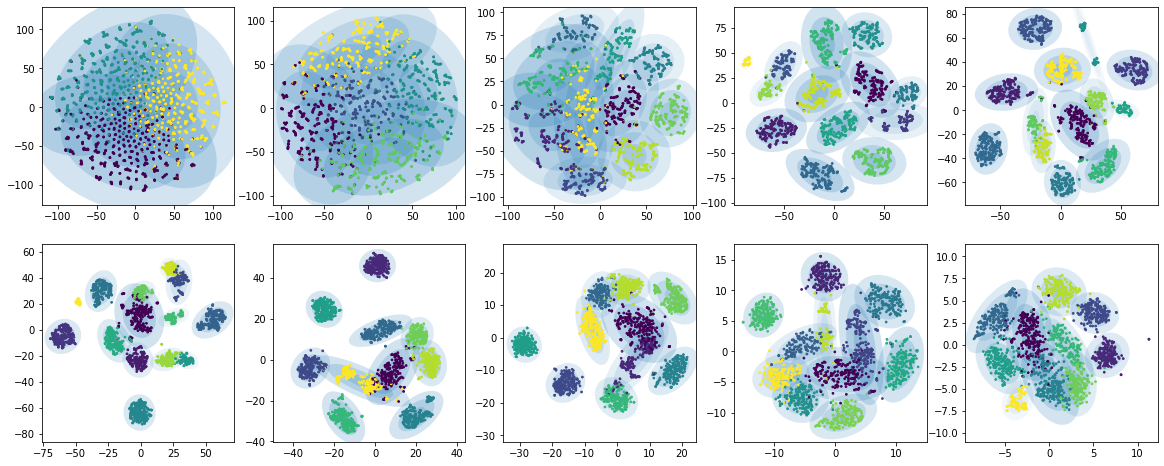

In [22]:
def run(data, ax):
	ca = cac.ClusterAmbiguity(S=3.0)
	score = ca.fit(data)
	vg.plot_gmm(ca.gmm, data, ca.gaussian_info["proba_labels"], ax=ax)
	return score

fig, ax = plt.subplots(2, 5, figsize=(20, 8))

for i in range(2):
	for j in range(5):
		score = run(X_tsne_list[i*5+j], ax[i, j])
		print(score, end="  ")
	print()